<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/nueral_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to Regression with neural networks in Tensorflow



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Creating features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18, 21.0, 24.0])

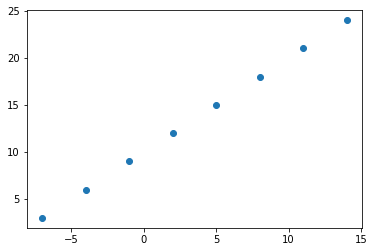

In [3]:
plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
 #input and output shapes

 #Predicting housing prices example
house_info = tf.constant(['Beds', 'baths', 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Beds', b'baths', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Case above house info shape is 3 and house price is shape = 1

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

^ this doesn't make the most sense becuase we only want to look at one sample 

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

^doesn't seem to have a shape because it has zero dimensions

In [8]:
X[0], y[0]

(-7.0, 3.0)

we want to predict one x value with one y value

In [9]:
#Turn numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

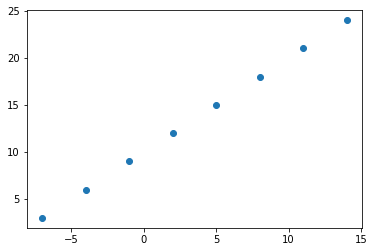

In [11]:
plt.scatter(X,y)

## Steps in modeling with tensorflow

1. Creating a model - define the input and output layers as well as the hideen layers of deep learning models
2. compile a model - define the loss function (the function which tells our model how wrong it is) and the optimizer. (tell the model how to improve the patterns and its learning) and evaluation metrics(what we can use to inerpret the performance of the model)
3. Fitting the model try to find the patterns between X and y(features and labels)



In [15]:
# setting random seed for reproducibility
tf.random.set_seed(42)

#1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is for mean aboslute error
              optimizer = tf.keras.optimizers.SGD(),#stochastic gradient descent
              metrics=['mae'])

#  3. Fit the model 
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # epochs set how many times the model goes thru the training data

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [16]:
#Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
#Try and make prediction using above model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 69ms/step


array([[12.716021]], dtype=float32)

In [19]:
y_pred + 11

array([[23.71602]], dtype=float32)

In [ ]:
# # practice writing out a model
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# model.add(tk.keras.layers.Dense(4))